<a href="https://colab.research.google.com/github/Infant-Joshva/Data-Science-learning-path/blob/main/DS-Practice-Notebooks/DS04-DL-NLP/Computer_vision/Image_Classification_with_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN with YOLO Model

## Installing packages

In [ ]:
!pip install ultralytics

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.4/112.6 GB disk)


## Data set



> Root Folder

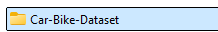

> Sub Folders

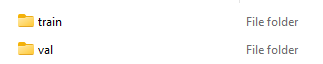

> Inside **Train,Val-Folder**-> Wee need to create a new folders for each class.Split the data for Train and Val as per our requirement quantity

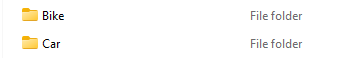






> Finally compress that folder and upload in Colab

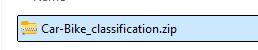

In [ ]:
!unzip '/content/Car-Bike_classification.zip'

## Model loading

In [7]:
from ultralytics import YOLO

# Pre-Train the model
model = YOLO("yolo11n-cls.pt") # For object detection

In [ ]:
model.train(data="/content/Car-Bike-Dataset", epochs=10, imgsz=256, batch=16) #Traning the model

In [8]:
tranied_model=YOLO('/content/runs/classify/train/weights/best.pt') #Fine tuned model

In [9]:
tranied_model

YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [10]:
result=tranied_model.predict('/content/Car-Bike-Dataset/val/Bike/Bike (1).jpeg')


image 1/1 /content/Car-Bike-Dataset/val/Bike/Bike (1).jpeg: 256x256 Bike 1.00, Car 0.00, 6.5ms
Speed: 3.9ms preprocess, 6.5ms inference, 0.1ms postprocess per image at shape (1, 3, 256, 256)


In [11]:
result

[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'Bike', 1: 'Car'}
 obb: None
 orig_img: array([[[188, 188, 188],
         [188, 188, 188],
         [188, 188, 188],
         ...,
         [188, 188, 188],
         [188, 188, 188],
         [188, 188, 188]],
 
        [[188, 188, 188],
         [188, 188, 188],
         [188, 188, 188],
         ...,
         [188, 188, 188],
         [188, 188, 188],
         [188, 188, 188]],
 
        [[188, 188, 188],
         [188, 188, 188],
         [188, 188, 188],
         ...,
         [188, 188, 188],
         [188, 188, 188],
         [188, 188, 188]],
 
        ...,
 
        [[ 57,  57,  57],
         [ 53,  53,  53],
         [ 50,  50,  50],
         ...,
         [ 19,  19,  19],
         [ 18,  18,  18],
         [ 18,  18,  18]],
 
        [[ 62,  62,  62],
         [ 61,  61,  61],
         [ 62,  62,  62],
         ...,
         [ 15,  15,  15],
         [ 16,  16,



```
0 is Bike - 1 is Car
```



In [12]:
#Finding the output of result

result[0].probs.top1

0

In [13]:
result=tranied_model.predict('/content/Car-Bike-Dataset/val/Car/Car (10).jpeg')


image 1/1 /content/Car-Bike-Dataset/val/Car/Car (10).jpeg: 256x256 Car 1.00, Bike 0.00, 5.9ms
Speed: 8.2ms preprocess, 5.9ms inference, 0.1ms postprocess per image at shape (1, 3, 256, 256)


In [14]:
result[0].probs.top1

1